In [51]:
from sklearn import cluster
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [52]:
data = pd.read_csv(r"C:\Users\liuke\OneDrive\桌面\HGCC code\HGNN obsv\chatgpt热度指数相关性分析-微博\appearance.csv")

In [61]:
earlypp_df = pd.read_csv(r"E:\代码\微博数据\1066话题前24h微博特征和总数.csv")

In [62]:
earlypp_df

Unnamed: 0  微博数  微博总长度  微博包含艾特数  微博转发数  微博评论数  微博点赞数  微博总互动数  \
0     2022-2023影响世界华人盛典   15   3644        0     21     42    142     205   
1              2023上海车展    1    348        0    219     84    121     424   
2          2023世界人工智能大会    1    551        0     10     61     36     107   
3             2023中关村论坛    1    242        0      0      0      0       0   
4      2023中国国际大数据产业博览会    1    287        0      0      1      1       2   
...                 ...  ...    ...      ...    ...    ...    ...     ...   
1061                高血压    3   1821        0     12      1     16      29   
1062               鸟鸟分鸟    7   1400        0     32     30    133     195   
1063        鹿晗elle五月刊封面    8    697        3     37     39    321     397   
1064           鹿晗想演邓超父亲    8    950        0      0      1     39      40   
1065       黄磊吴越都没考上徐峥的班   18  19562        0      0      0      0       0   

        a     n     v    d  final_blogs_number  
0      30   331   405   95                  16  
1       3    43    32   15                   8  
2       2    58    37    4                  33  
3       1    32    16    5                   5  
4       1    46    20    3                   6  
...   ...   ...   ...  ...                 ...  
1061   55   225   191   46                   7  
1062   27   214   132   37                   9  
1063   14    47    65   22                   8  
1064    7    78   122   32                   8  
1065  127  1920  1620  400                  18  

[1066 rows x 13 columns]

In [63]:
data

Unnamed: 0      0  前24h百度抖音热度均值  话题1h微博数  day_num  chatgpt聚类
0     2022-2023影响世界华人盛典   7月8日       27669.0        3       99          0
1              2023上海车展  4月11日      117453.5        1       14          1
2          2023世界人工智能大会   5月4日       94191.0        1       37          0
3             2023中关村论坛  5月17日       57631.0        1       50          0
4      2023中国国际大数据产业博览会  4月20日      101651.0        1       23          1
...                 ...    ...           ...      ...      ...        ...
1061                高血压  3月31日      319310.0        1        3          1
1062               鸟鸟分鸟   4月4日      207636.5        5        7          1
1063        鹿晗elle五月刊封面  4月19日      102820.5        7       22          1
1064           鹿晗想演邓超父亲  4月19日      102820.5        8       22          1
1065       黄磊吴越都没考上徐峥的班  5月20日      150156.0        9       53          0

[1066 rows x 6 columns]

In [64]:
X1 = data.iloc[:,2]  # chatgpt热度
X2 = earlypp_df.iloc[:,1] # 话题早期热度

(-0.06666885942136924, 0.029511665255100388)

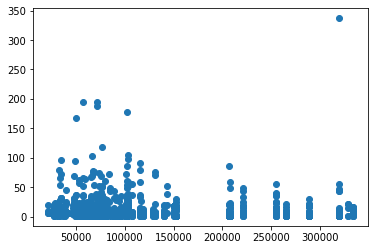

In [65]:
# Example1
fig,ax = plt.subplots()
ax.scatter(X1,X2)
stats.pearsonr(X1,X2)

In [66]:
X = pd.concat([X1,X2],axis = 1)
X = X.values

In [67]:
# X = X2.to_numpy()
# X = X.reshape(-1, 1)

In [69]:
# 导入包
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#自己创建数据集
max_in = 0
clu_num = 0

for i in range(100,101):
    n_clusters=i
    cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    y_pred = cluster.predict(X)
    if i == 100:
        y_ = pd.DataFrame(y_pred)
        y_.to_csv("话题早期热度聚类.csv")
    centroid = cluster.cluster_centers_# 质心
    # 输出整体平方和和轮廓系数
    # print(centroid)
    inertia = cluster.inertia_
    print("K = %s 整体平方和："%i,inertia)
    s_score = silhouette_score(X,y_pred)
    print("K = %s轮廓系数："%i,s_score)
    if s_score  > max_in:
        max_in = s_score 
        clu_num = i
    
    print(f"聚类数量={clu_num}，轮廓系数最大={max_in}")
    
    
#     # 可视化结果
#     color = ["red","pink","orange","gray","green","purple","black","blue","yellow","brown"]
#     fig, ax1 = plt.subplots(1,sharey=True)
#     for i in range(n_clusters):
#         ax1.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
#                     ,marker='o'
#                     ,s=8
#                     ,c=color[i]
#                     )
#         ax1.set_title("K=%s"%i,fontsize=15)
#         ax1.scatter(centroid[:,0],centroid[:,1]
#                         ,marker="x"
#                         ,s=35
#                         ,c="black")
# plt.show()


K = 100 整体平方和： 375813.21260398853
K = 100轮廓系数： 0.9595723953475686
聚类数量=100，轮廓系数最大=0.9595723953475686


In [ ]:
cluster_ = cluster()